# This part 2 of 3 TBD very soon

**Other notebooks:** <br>
[Part 1: Data mining and munging](tdp_1_3_data_mining_and_cleaning.ipynb)<br>
[Part 3: Data modeling](tdp_3_3_data_modeling.ipynb)

In [127]:
# %load_ext watermark
%reload_ext watermark
%watermark -a "Norbert Oksza Strzelecki" -v -p numpy,pandas,matplotlib,seaborn

Norbert Oksza Strzelecki 

CPython 3.6.6
IPython 6.5.0

numpy 1.15.2
pandas 0.23.4
matplotlib 3.0.0
seaborn 0.9.0


In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()

### Data loading

In [129]:
# Main data for modeling
biker_class = pd.read_csv('processed/clean_biker_class.csv', index_col=0)

# Additional parts for statistics
biker_stats = pd.read_csv('preprocessed/pre_biker_stats.csv', index_col=0)
biker_by_stage = pd.read_csv('preprocessed/pre_biker_by_stage.csv', index_col=0)
stage_results = pd.read_csv('preprocessed/pre_stages.csv', index_col=False)
stage_class = pd.read_csv('preprocessed/pre_stages_summary.csv', index_col=False)

# Statistics

In [130]:
biker_class.shape

(5255, 84)

In [131]:
biker_class[biker_class.time_in_s < 999999].shape

(4975, 84)

In [132]:
# Number of bikers that DNF or DNS in any stage
biker_class.shape[0] - biker_class[biker_class.time_in_s < 999999].shape[0]

280

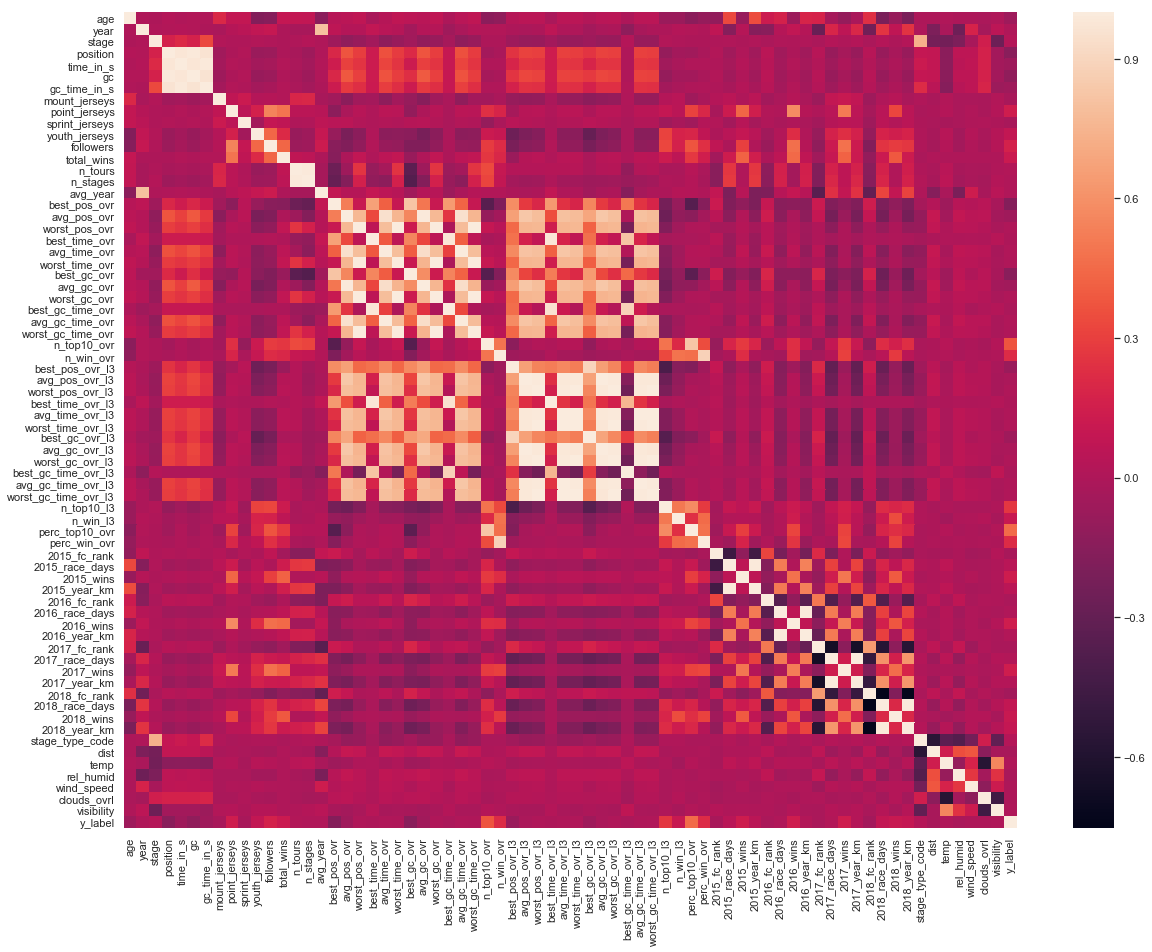

In [133]:
# plot heatmap

fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(biker_class.corr(), ax=ax)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90);

In [134]:
# Dataframe with no DNFs and DNSs set to '999999' value
biker_class[biker_class.time_in_s < 999999].describe().round(2)

,age,year,stage,position,time_in_s,gc,gc_time_in_s,mount_jerseys,point_jerseys,sprint_jerseys,...,2018_wins,2018_year_km,stage_type_code,dist,temp,rel_humid,wind_speed,clouds_ovrl,visibility,y_label
count,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,...,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00
mean,28.20,2015.97,3.69,75.93,14469.70,75.93,53322.67,0.65,0.99,0.15,...,0.63,7487.66,1.93,164.29,25.24,38.57,2.54,4.53,7.47,0.07
std,4.25,1.44,1.93,45.93,5189.35,45.93,30607.92,1.36,2.43,0.45,...,1.51,3815.75,1.33,53.64,4.49,26.40,1.27,2.20,1.25,0.25
min,20.00,2014.00,1.00,1.00,1725.00,1.00,9783.00,0.00,0.00,0.00,...,0.00,0.00,1.00,25.00,12.50,0.00,0.00,0.00,4.00,0.00
25%,25.00,2015.00,2.00,37.00,11399.00,37.00,22603.50,0.00,0.00,0.00,...,0.00,5724.00,1.00,135.00,22.10,24.00,2.00,2.00,7.00,0.00
50%,28.00,2016.00,4.00,74.00,13358.00,74.00,53492.00,0.00,0.00,0.00,...,0.00,8425.60,1.00,161.00,25.50,38.00,3.00,5.00,8.00,0.00
75%,31.00,2017.00,5.00,111.50,19003.00,111.50,77169.00,1.00,1.00,0.00,...,1.00,10385.00,2.00,218.00,29.50,61.00,4.00,6.00,8.00,0.00
max,44.00,2018.00,7.00,199.00,24240.00,199.00,115326.00,11.00,36.00,4.00,...,17.00,13428.90,6.00,240.00,33.20,90.00,5.00,8.00,9.00,1.00


In [135]:
biker_class.describe(include='object')

,name,nation,team,2015_div,2015_team,2016_div,2016_team,2017_div,2017_team,2018_div,2018_team,date,finish,wind_dir
count,5255,5255,5255,5255,5255,5255,5255,5255,5255,5255,5255,5255,5255,5255
unique,513,44,69,4,96,4,79,4,78,4,75,34,13,15
top,J.Fröhlinger,Italy,Team Sky,PRT,Team Katusha,PRT,Team Katusha,PRT,NONE,PRT,NONE,2016-07-12,Katowice,NW
freq,34,875,250,3332,270,3716,265,3541,302,3219,541,200,818,1105


**Age distribution**

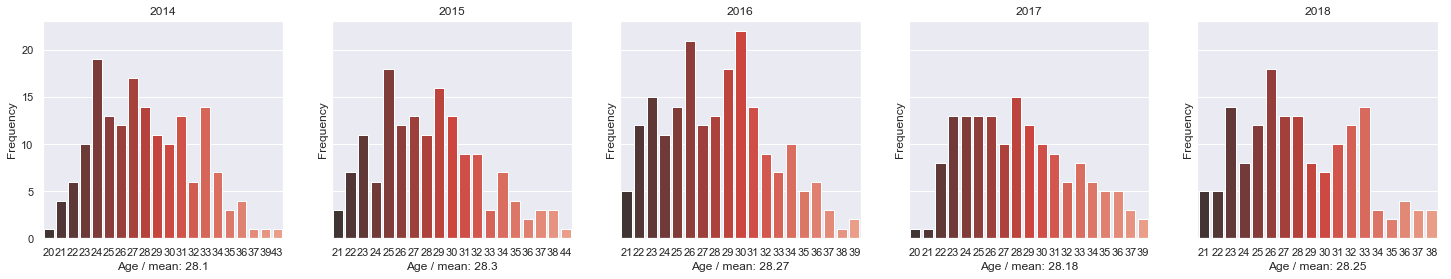

In [136]:
# Age distribution through tours
i = 0
fig, ax = plt.subplots(1,5, figsize=(25,4), sharey=True)
for year in range(2014,2019):
    sns.countplot(x="age", data=stage_results[stage_results.year == year][['name','age']].drop_duplicates(),
                  palette="Reds_d", orient='h', ax=ax[i])
    ax[i].set_title(year)
    ax[i].set_xlabel('Age / mean: %s' % round(stage_results[stage_results.year == year][['name','age']]\
                                              .drop_duplicates()['age'].mean(), 2))
    ax[i].set_ylabel('Frequency')
    i += 1

**Nationality distribution**

In [137]:
print('Bikers are from {} different counties'.format(biker_class['nation'].drop_duplicates().count()))

Bikers are from 44 different counties


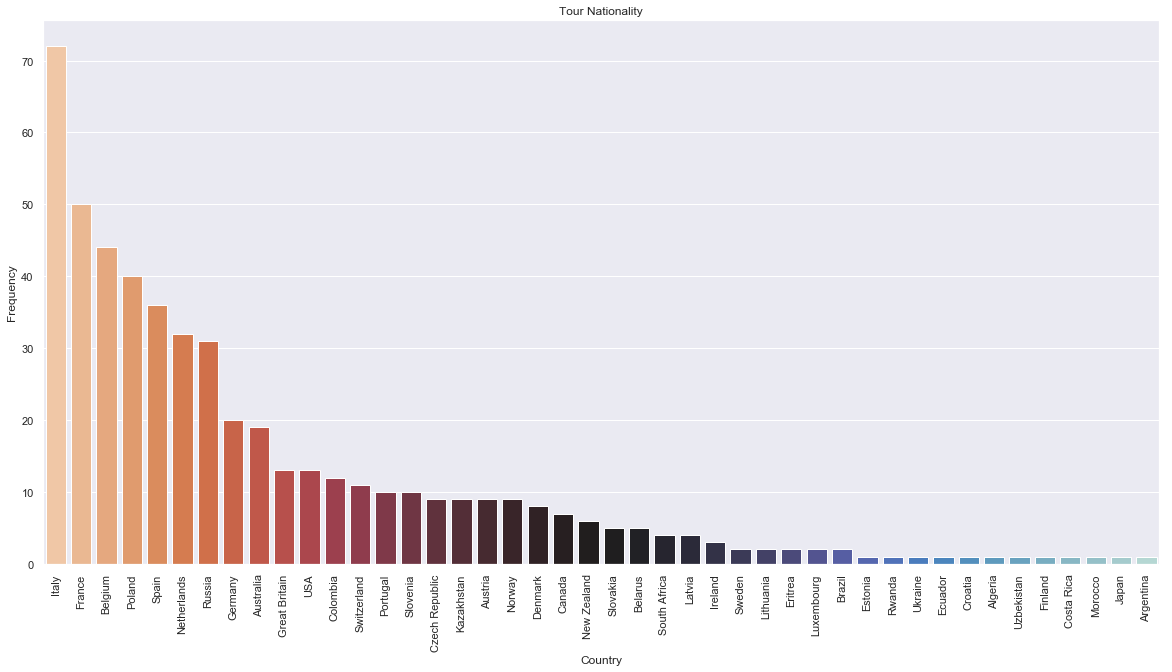

In [138]:
# Allover nationality distribution in all tours
nation_distribution = biker_class[['name','nation']].drop_duplicates()

plt.figure(figsize=(20,10))
sns.countplot(x='nation', 
              data=nation_distribution,
              order=nation_distribution['nation'].value_counts().index,
              palette="icefire_r")
plt.title('Tour Nationality')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Country')
plt.show()

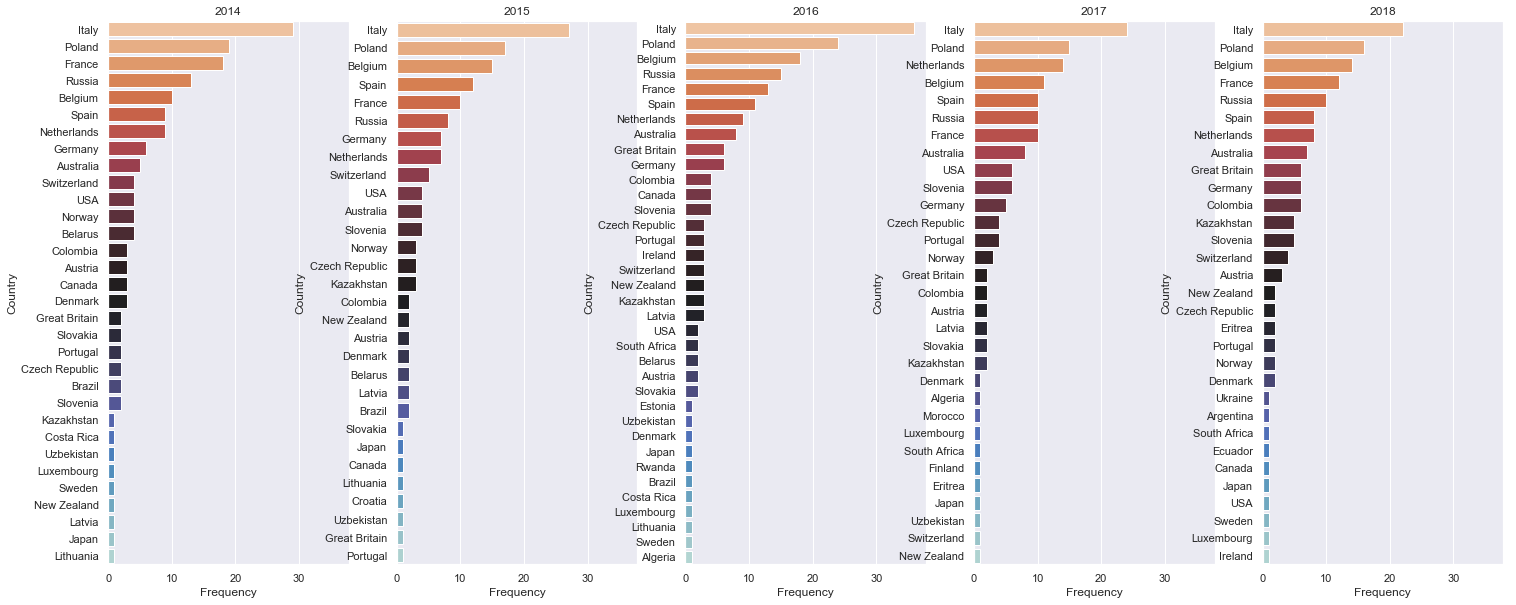

In [139]:
# Nationality distribution year-by-year
i = 0
fig, ax = plt.subplots(1,5, figsize=(25,10), sharey=False, sharex=True)
for year in range(2014,2019):
    ax[i] = sns.countplot(y="nation", data=biker_class[biker_class.year == year][['name','nation']].drop_duplicates(),
#                   order=biker_class['nation'].value_counts().index,
                  order=biker_class[biker_class.year == year]['nation'].value_counts().index,
                  palette="icefire_r", orient='h', ax=ax[i])
    ax[i].set_title(year)
    ax[i].set_xlabel('Frequency')
    ax[i].set_ylabel('Country')
    i += 1

In [275]:
def top10_jerseys_barplot(jersey_type, title):
    # Printing table
    print(biker_class[['name','nation',str(jersey_type)+'_jerseys']].drop_duplicates()\
          .sort_values(str(jersey_type)+'_jerseys',ascending=False).head(10).reset_index(drop=True))
    # Ploting barplot
    sns.barplot(x='name',
                y=str(jersey_type)+'_jerseys', data=biker_class[['name','nation',str(jersey_type)+'_jerseys']]\
                  .drop_duplicates().sort_values(str(jersey_type)+'_jerseys', ascending=False).head(10),
                palette="icefire_r")
    plt.xticks(rotation=90)
    plt.ylabel('No. of {} jerseys'.format(str(jersey_type)))
    plt.xlabel('Rider')
    plt.title('Top10 '+str(title))
    plt.show()

              name     nation  point_jerseys
0          P.Sagan   Slovakia             36
1        A.Greipel    Germany             23
2  E.Boasson Hagen     Norway             18
3         D.Tanner     Norway             16
4        D.Bennati      Italy             12
5         M.Kittel    Germany             10
6       N.Bouhanni     France             10
7        E.Viviani      Italy              8
8          C.Meyer  Australia              8
9         T.Farrar        USA              8


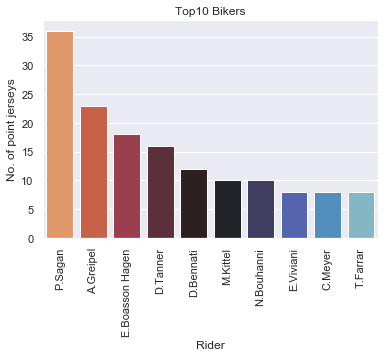

In [276]:
# Top10 bikers
top10_jerseys_barplot('point', 'Bikers')

           name   nation  mount_jerseys
0    T.De Gendt  Belgium             11
1     P.Niemiec   Poland             11
2  M.Rutkiewicz   Poland              7
3   B.Lambrecht  Belgium              5
4     P.Gilbert  Belgium              4
5    G.Preidler  Austria              4
6  T.Marczynski   Poland              4
7     W.Barguil   France              4
8       R.Majka   Poland              4
9      O.Fraile    Spain              4


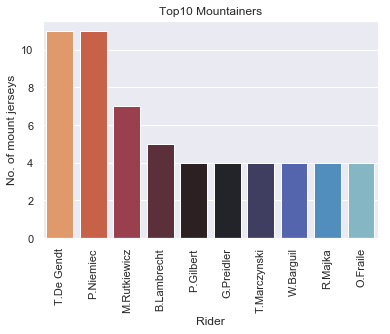

In [278]:
# Top10 mountainers
top10_jerseys_barplot('mount','Mountainers')

          name       nation  sprint_jerseys
0   T.De Gendt      Belgium               4
1    P.Gilbert      Belgium               4
2   G.Stepniak       Poland               2
3     S.Spilak     Slovenia               2
4      A.Kurek       Poland               2
5     M.Belkov       Russia               2
6      A.Hodeg     Colombia               2
7   M.Albasini  Switzerland               2
8    J.Tratnik     Slovenia               2
9  M.Burghardt      Germany               2


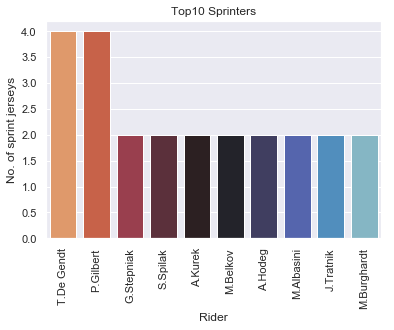

In [279]:
# Top10 sprinters
top10_jerseys_barplot('sprint', 'Sprinters')